In [104]:
import numpy as np
import pandas as pd
import copy
import time
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [152]:
def Boll_Band(DF,n=20):
    df=DF.copy()
    df["MB"]=df["Adj Close"].rolling(n).mean()
    df["UB"]=df["MB"]+2*df["Adj Close"].rolling(n).std(ddof=0)
    df["LB"]=df["MB"]-2*df["Adj Close"].rolling(n).std(ddof=0)
    df["BB_Width"]=df["UB"]-df["LB"]
    return df[["MB","UB","LB","BB_Width"]]

In [153]:
# download the data
ticker="SPY"
spy=yf.download(ticker,period='60d',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [154]:
spy

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-06-28 09:30:00-04:00,390.230011,392.880005,390.140015,392.579987,392.579987,3544636
2022-06-28 09:35:00-04:00,392.670013,393.160004,392.329987,392.724213,392.724213,1412036
2022-06-28 09:40:00-04:00,392.724213,392.980011,392.200012,392.640991,392.640991,1109705
2022-06-28 09:45:00-04:00,392.630005,392.770111,391.899994,392.720001,392.720001,982399
2022-06-28 09:50:00-04:00,392.690002,392.929993,392.410004,392.670013,392.670013,847901
...,...,...,...,...,...,...
2022-09-21 13:15:00-04:00,385.970001,385.970001,385.605011,385.765808,385.765808,191365
2022-09-21 13:20:00-04:00,385.765015,385.790009,385.600006,385.709991,385.709991,234288
2022-09-21 13:25:00-04:00,385.720001,386.010010,385.619995,385.984985,385.984985,318299


In [161]:
Bollinger=Boll_Band(spy)
Bollinger

,MB,UB,LB,BB_Width
Datetime,,,,
2022-06-28 09:30:00-04:00,NaN,NaN,NaN,NaN
2022-06-28 09:35:00-04:00,NaN,NaN,NaN,NaN
2022-06-28 09:40:00-04:00,NaN,NaN,NaN,NaN
2022-06-28 09:45:00-04:00,NaN,NaN,NaN,NaN
2022-06-28 09:50:00-04:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-09-21 13:15:00-04:00,386.184778,386.680325,385.689231,0.991094
2022-09-21 13:20:00-04:00,386.157527,386.692966,385.622089,1.070877
2022-09-21 13:25:00-04:00,386.161276,386.690746,385.631806,1.058940


In [166]:
signal_list=[]
signal=""
for i in range(len(spy)):
    if signal=="":
        if spy["Adj Close"][i]>=Bollinger["UB"][i]:
            signal="Buy Call"
            signal_list.append(signal)
        elif spy["Adj Close"][i]<=Bollinger["LB"][i]:
            signal="Buy Put"
            signal_list.append(signal)
        else:
            signal_list.append("")
    elif signal=="Buy Call":
        #sell signal
        if spy["Adj Close"][i]<=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
        else:
            signal_list.append("")
    elif signal=="Buy Put":
        #sell signal
        if spy["Adj Close"][i]>=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
        else:
            signal_list.append("")

In [203]:
signal_list=[]
signal=""
return_list=[]
for i in range(len(spy)):
    if signal=="":
        if spy["Adj Close"][i]>=Bollinger["UB"][i]:
            signal="Buy Call"
            signal_list.append(signal)
            cost=spy["Adj Close"][i]
            return_list.append(0)
        elif spy["Adj Close"][i]<=Bollinger["LB"][i]:
            signal="Buy Put"
            signal_list.append(signal)
            cost=spy["Adj Close"][i]
            return_list.append(0)
        else:
            signal_list.append("")
            return_list.append(0)
    elif signal=="Buy Call":
        #sell signal
        if spy["Adj Close"][i]<=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
            return_list.append(spy["Adj Close"][i]-cost)
        else:
            signal_list.append("")
            return_list.append(0)
            
    elif signal=="Buy Put":
        #sell signal
        if spy["Adj Close"][i]>=Bollinger["MB"][i]:
            signal_list.append("Sell")
            signal=""
            return_list.append(cost-spy["Adj Close"][i])
        else:
            signal_list.append("")
            return_list.append(0)

In [204]:
len(signal_list)

4652

In [205]:
len(return_list)

4652

In [206]:
Bollinger["signal"]=signal_list
Bollinger["return"]=return_list

In [207]:
Bollinger

,MB,UB,LB,BB_Width,signal,return
Datetime,,,,,,
2022-06-28 09:30:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-28 09:35:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-28 09:40:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-28 09:45:00-04:00,NaN,NaN,NaN,NaN,,0.0
2022-06-28 09:50:00-04:00,NaN,NaN,NaN,NaN,,0.0
...,...,...,...,...,...,...
2022-09-21 13:15:00-04:00,386.184778,386.680325,385.689231,0.991094,,0.0
2022-09-21 13:20:00-04:00,386.157527,386.692966,385.622089,1.070877,,0.0
2022-09-21 13:25:00-04:00,386.161276,386.690746,385.631806,1.058940,,0.0


<AxesSubplot:xlabel='Datetime'>

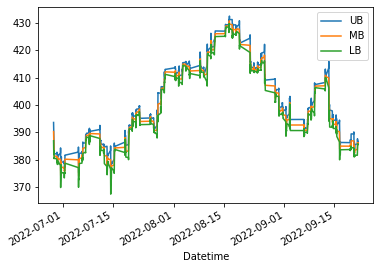

In [209]:
Bollinger[["UB","MB","LB"]].plot()

In [211]:
import numpy as np
np.sum(Bollinger['return'])

16.8565673828125

In [213]:
Bollinger['return'].sum()

16.8565673828125

In [214]:
Bollinger['return'].cumsum()

Datetime
2022-06-28 09:30:00-04:00     0.000000
2022-06-28 09:35:00-04:00     0.000000
2022-06-28 09:40:00-04:00     0.000000
2022-06-28 09:45:00-04:00     0.000000
2022-06-28 09:50:00-04:00     0.000000
                               ...    
2022-09-21 13:15:00-04:00    16.856567
2022-09-21 13:20:00-04:00    16.856567
2022-09-21 13:25:00-04:00    16.856567
2022-09-21 13:30:00-04:00    16.856567
2022-09-21 13:32:33-04:00    16.856567
Name: return, Length: 4652, dtype: float64

In [215]:
Bollinger["cum_return"]=Bollinger['return'].cumsum()

In [221]:
Bollinger["Adj Close"]=spy["Adj Close"]

In [224]:
Bollinger

,MB,UB,LB,BB_Width,signal,return,cum_return,Adj Close
Datetime,,,,,,,,
2022-06-28 09:30:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,392.579987
2022-06-28 09:35:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,392.724213
2022-06-28 09:40:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,392.640991
2022-06-28 09:45:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,392.720001
2022-06-28 09:50:00-04:00,NaN,NaN,NaN,NaN,,0.0,0.000000,392.670013
...,...,...,...,...,...,...,...,...
2022-09-21 13:15:00-04:00,386.184778,386.680325,385.689231,0.991094,,0.0,16.856567,385.765808
2022-09-21 13:20:00-04:00,386.157527,386.692966,385.622089,1.070877,,0.0,16.856567,385.709991
2022-09-21 13:25:00-04:00,386.161276,386.690746,385.631806,1.058940,,0.0,16.856567,385.984985


<AxesSubplot:xlabel='Datetime'>

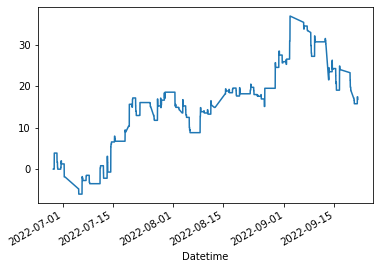

In [222]:
Bollinger["cum_return"].plot()

In [223]:
Bollinger.to_csv('bollinger_strategy.csv')